# Feature clustering

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
X = pd.read_csv(
    './../../../data_source/to_analysis/complete_decorr.csv', 
    index_col=0
)
dfs = pd.read_csv(
    './../../../data_source/to_analysis/target_dfs.csv', index_col=0
)
lrr = pd.read_csv(
    './../../../data_source/to_analysis/target_lrr.csv', index_col=0
)
X.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxis,original_shape_MajorAxis,original_shape_Sphericity,CT original_firstorder_10Percentile,CT original_firstorder_90Percentile,CT original_firstorder_Energy,CT original_firstorder_Entropy,CT original_firstorder_InterquartileRange,...,Cisplatin_2,Cisplatin_3,Cisplatin_4,Cisplatin_5,Cisplatin_6,Stage 1,Stage 2,Stage 3,Stage 4,forward_corr
patient,,,,,,,,,,,,,,,,,,,,,
2,0.738882,0.723925,27.060529,37.380273,0.661532,0.097696,0.221526,568.990940,0.183969,0.056668,...,0,0,0,0,1,0,0,0,1,1.306738
4,0.796900,0.629917,19.845151,31.504408,0.701721,-0.315120,0.171638,526.512287,0.990405,0.182336,...,0,0,0,1,0,0,0,0,1,1.164781
5,0.600926,0.535140,22.515072,42.073251,0.762365,-0.084255,0.278018,815.922259,0.627742,0.110940,...,0,0,0,0,0,0,1,0,0,0.666036
8,0.784571,0.414247,30.263897,73.057649,0.520001,0.022160,0.187135,3844.580668,0.415386,0.064696,...,0,1,0,0,0,0,0,0,1,1.365648
10,0.690320,0.539743,19.449801,36.035312,0.643822,-0.180616,-0.068998,428.168548,0.063316,0.044584,...,0,0,0,0,1,0,0,0,1,4.761471


In [42]:
X -= X.mean(axis=0)
X /= X.std(axis=0)
X.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxis,original_shape_MajorAxis,original_shape_Sphericity,CT original_firstorder_10Percentile,CT original_firstorder_90Percentile,CT original_firstorder_Energy,CT original_firstorder_Entropy,CT original_firstorder_InterquartileRange,...,Cisplatin_2,Cisplatin_3,Cisplatin_4,Cisplatin_5,Cisplatin_6,Stage 1,Stage 2,Stage 3,Stage 4,forward_corr
patient,,,,,,,,,,,,,,,,,,,,,
2,0.298844,1.674005,0.458751,-0.432048,-0.081711,0.305082,-0.309278,-0.182023,-0.942854,-0.698857,...,-0.160549,-0.230050,-0.370452,-0.838646,2.407936,-0.10076,-0.305693,-0.494008,0.649859,-0.464290
4,0.692748,0.912154,-0.292368,-0.795698,0.414013,-1.115453,-0.525782,-0.183469,1.848005,1.759093,...,-0.160549,-0.230050,-0.370452,1.186377,-0.413196,-0.10076,-0.305693,-0.494008,0.649859,-0.499274
5,-0.637794,0.144078,-0.014430,-0.141604,1.162043,-0.321025,-0.064117,-0.173613,0.592925,0.362645,...,-0.160549,-0.230050,-0.370452,-0.838646,-0.413196,-0.10076,3.254733,-0.494008,-1.531024,-0.622187
8,0.609046,-0.835645,0.792221,1.775986,-1.827454,0.045155,-0.458530,-0.070469,-0.141982,-0.541835,...,-0.160549,4.324934,-0.370452,-0.838646,-0.413196,-0.10076,-0.305693,-0.494008,0.649859,-0.449772
10,-0.030862,0.181381,-0.333524,-0.515286,-0.300152,-0.652612,-1.570087,-0.186818,-1.360402,-0.935204,...,-0.160549,-0.230050,-0.370452,-0.838646,2.407936,-0.10076,-0.305693,-0.494008,0.649859,0.387107


## Affinity propagation clustering algorithm

In [8]:
from sklearn import metrics
from sklearn.cluster import AffinityPropagation

Estimated number of clusters: 37
Homogeneity: 0.212
Completeness: 0.044
V-measure: 0.073
Adjusted Rand Index: 0.004
Adjusted Mutual Information: 0.008


/Users/severinlangberg/anaconda/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Text(0.5, 1.0, 'Estimated number of clusters: 37')

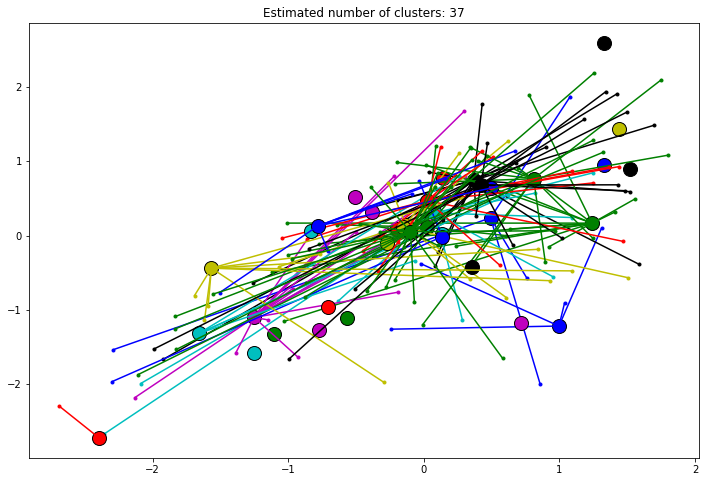

In [43]:
labels_true = np.squeeze(dfs.values)
#labels_true = np.squeeze(lrr.values)

# Compute Affinity Propagation
af = AffinityPropagation().fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

from itertools import cycle

plt.close('all')
plt.figure(figsize=(12, 8))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X.values[cluster_centers_indices[k]]
    plt.plot(X.values[class_members, 0], X.values[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X.values[class_members, :]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)

## Agglomerative Clustering

In [44]:
from time import time

from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering

# Good clustering = separate numbers in each color group.

Computing embedding
Done.
ward :	0.01s
average :	0.00s
complete :	0.00s
single :	0.00s


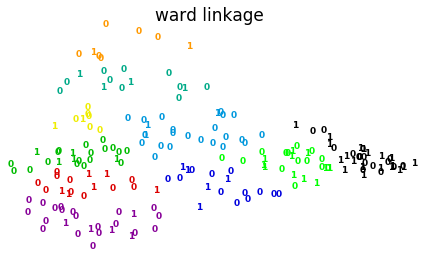

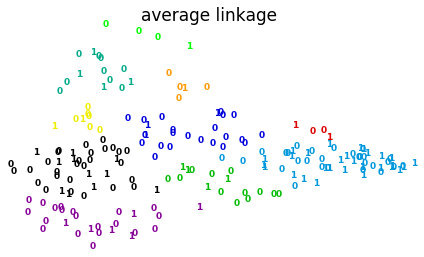

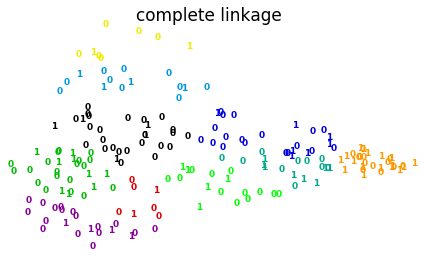

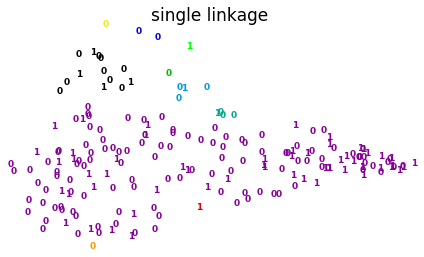

In [45]:
y = np.squeeze(dfs.values)
#y = np.squeeze(lrr.values)


def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    

print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

In [46]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

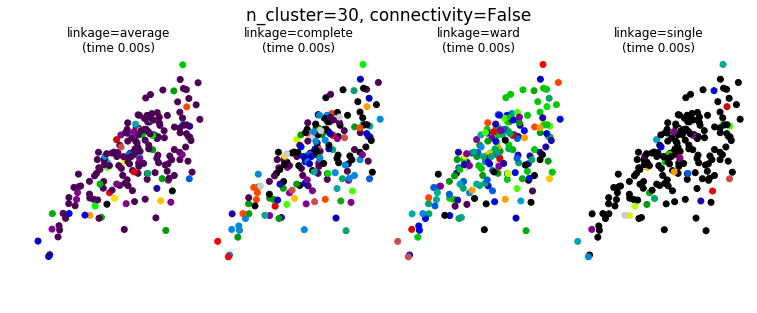

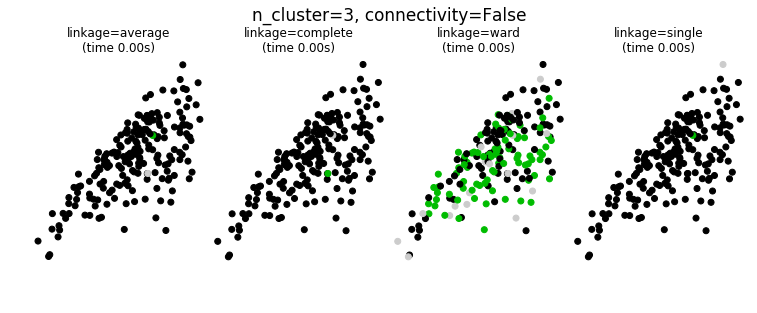

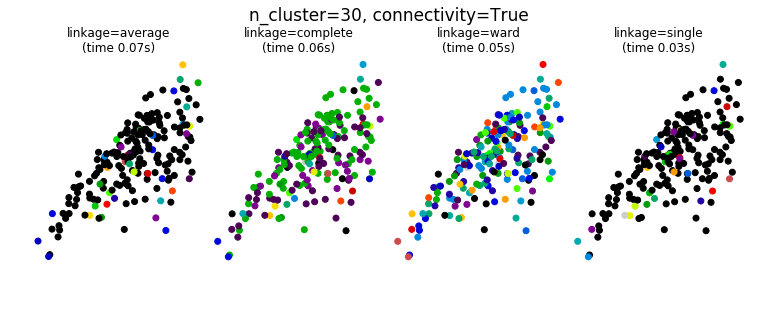

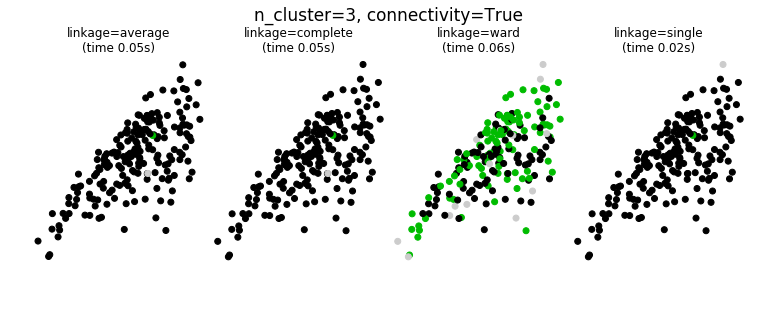

In [49]:
# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time()
            model.fit(X)
            elapsed_time = time() - t0
            plt.scatter(X.values[:, 0], X.values[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)

## DBSCAN

In [50]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

Estimated number of clusters: 0
Estimated number of noise points: 198
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


/Users/severinlangberg/anaconda/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Text(0.5, 1.0, 'Estimated number of clusters: 0')

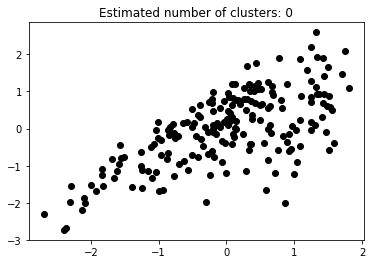

In [54]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X.values[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X.values[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)